This is a reference to debug my own NN that was having bugs ... thanks to this [blog](https://jonathanweisberg.org/post/A%20Neural%20Network%20from%20Scratch%20-%20Part%201/) from **JONATHAN WEISBERG**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

%matplotlib inline

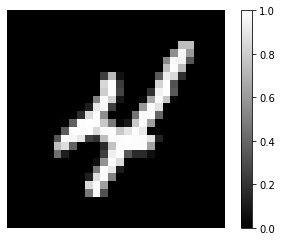

In [5]:
(x, y), _ = datasets.mnist.load_data()
x = x.reshape(-1, 28 * 28) / x.max()

## One hot encoding
y_aux = np.zeros((len(x), 10))
for c in range(10):
  y_aux[:, c] = (y == c).astype(np.int16)
y = y_aux

image = x[9].reshape(28,28)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.colorbar()

In [6]:
train_with = int(0.7 * len(x))
x_train = x[:train_with]
x_test = x[train_with:]
y_train = y[:train_with]
y_test = y[train_with:]
x_train.shape, x_test.shape

((42000, 784), (18000, 784))

In [13]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [8]:
n_h = 64
n_x = 784
digits = 10

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

In [16]:
learning_rate = 1
X = x_train.T
Y = y_train.T
m, _ = y_train.shape

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.285566356780636
Epoch 100 cost:  0.726490461325941
Epoch 200 cost:  0.5532160755466199
Epoch 300 cost:  0.47544429607491967
Epoch 400 cost:  0.42709317348293885
Epoch 500 cost:  0.39297143412287433
Epoch 600 cost:  0.36720873659595143
Epoch 700 cost:  0.3467958412455317
Epoch 800 cost:  0.3299783357695844
Epoch 900 cost:  0.3156794862960522
Epoch 1000 cost:  0.30323180556489127
Epoch 1100 cost:  0.2922059490621021
Epoch 1200 cost:  0.28230888304650964
Epoch 1300 cost:  0.2733313992928625
Epoch 1400 cost:  0.2651217686224627
Epoch 1500 cost:  0.2575706884280193
Epoch 1600 cost:  0.2505966963600046
Epoch 1700 cost:  0.24413282045203552
Epoch 1800 cost:  0.23811920457303834
Epoch 1900 cost:  0.2325013647591587
Final cost: 0.22728189294997486
